In [24]:
import numpy as np
import pandas as pd  

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [26]:
boston = load_boston()

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


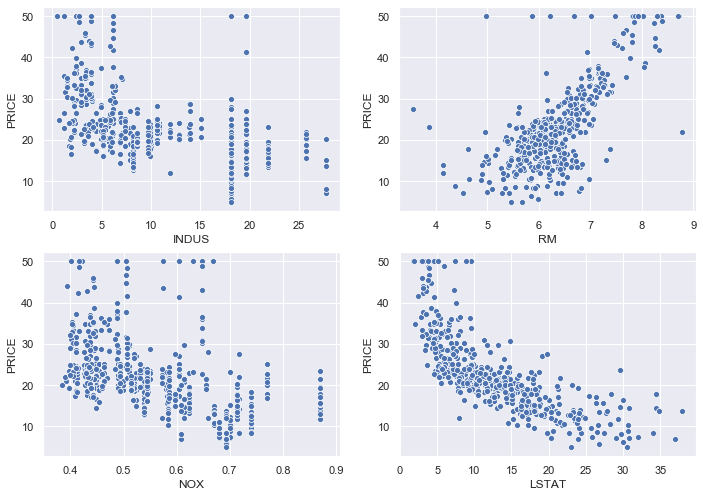

In [29]:
variables = ['INDUS', 'NOX', 'RM', 'LSTAT']
fig, axs = plt.subplots(ncols=2, nrows=2)
for i in range(0, 4):
    sns.scatterplot(x=variables[i], y='PRICE', data=bos, ax=axs[i % 2][i // 2])

In [31]:
X = bos.drop('PRICE', axis=1).values
y = bos.PRICE.values
X.shape, y.shape

((506, 13), (506,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression().fit(X_train, y_train)

mean absolute error (MSE):
$$mse(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} \lvert y_i - \hat{y_i} \rvert$$

In [35]:
mean_absolute_error(y_test, lr.predict(X_test)),

(3.447122276148069,)

In [36]:
print("coef: {}, intercept: {}".format(lr.coef_, lr.intercept_))

coef: [-1.09345106e-01  5.14771860e-02 -1.35771811e-02  3.11370157e+00
 -1.53107579e+01  3.54796861e+00 -4.78707187e-03 -1.49453646e+00
  3.17255788e-01 -1.20148597e-02 -9.28169726e-01  1.03065117e-02
 -5.58857305e-01], intercept: 37.03977851074369


In [37]:
y_hat = lr.predict(X_test)
print("y_hat: {}, y_true: {}".format(y_hat[:5], y_test[:5]))

y_hat: [11.77151635 20.56669026 23.02763927 21.29307457 19.61668807], y_true: [16.3 13.8 17.  16.8 18.5]


### How do we find $\beta_i$?

$\boldsymbol{Y} = \boldsymbol{X}\beta + \epsilon$

From linear algebra we know how to solve $\boldsymbol{A}x = \boldsymbol{b}$:

$x = \boldsymbol{A}^{-1}\boldsymbol{b}$

or 

$\boldsymbol{A^TA}x = \boldsymbol{A^Tb}$

$x = (\boldsymbol{A^TA})^{-1}\boldsymbol{A^T}\boldsymbol{b}$

In [38]:
A = np.hstack([X_train, np.ones(shape=(len(X_train), 1))])
b = y_train
A.shape, b.shape

((404, 14), (404,))

In [39]:
x_hat = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
coeff = x_hat[:13]
intercept = x_hat[13]
print("coef: {}, intercept: {}".format(coeff, intercept))

coef: [-1.09345106e-01  5.14771860e-02 -1.35771811e-02  3.11370157e+00
 -1.53107579e+01  3.54796861e+00 -4.78707187e-03 -1.49453646e+00
  3.17255788e-01 -1.20148597e-02 -9.28169726e-01  1.03065117e-02
 -5.58857305e-01], intercept: 37.03977851075313


In [40]:
y_hat = X_test.dot(coeff) + intercept
print("y_hat: {}, y_true: {}".format(y_hat[:5], y_test[:5]))

y_hat: [11.77151635 20.56669026 23.02763927 21.29307457 19.61668807], y_true: [16.3 13.8 17.  16.8 18.5]


### Solve via QR Decomposition

$A = QR$

where A is the matrix that we wish to decompose, Q is a matrix with the size n x n, and R is an upper triangle matrix with the size n x m.

$x = R^{-1}Q^Tb$

In [41]:
Q, R = np.linalg.qr(A)
x_hat = np.linalg.inv(R).dot(Q.T).dot(b)
coeff = x_hat[:13]
intercept = x_hat[13]
print("coef: {}, intercept: {}".format(coeff, intercept))

coef: [-1.09345106e-01  5.14771860e-02 -1.35771811e-02  3.11370157e+00
 -1.53107579e+01  3.54796861e+00 -4.78707187e-03 -1.49453646e+00
  3.17255788e-01 -1.20148597e-02 -9.28169726e-01  1.03065117e-02
 -5.58857305e-01], intercept: 37.03977851074424


In [42]:
y_hat = X_test.dot(coeff) + intercept
print("y_hat: {}, y_true: {}".format(y_hat[:5], y_test[:5]))

y_hat: [11.77151635 20.56669026 23.02763927 21.29307457 19.61668807], y_true: [16.3 13.8 17.  16.8 18.5]
